Resp missing data prediction Prediction using Mean Imputation:

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/nargeshosseinzadeh/Downloads/Dataset (2).csv')

# Perform mean imputation
# Calculate the mean of non-missing values in the 'Resp' column
mean_hr = df['Resp'].mean()

imputed_values1 = df.groupby('Patient_ID')['Resp'].transform(lambda x: x.fillna(x.mean()))


# Save
save_path = '/Users/nargeshosseinzadeh/imputed_dataset1.csv'

# Save the imputed dataset with imputed values for further analysis
df['ImputedRespMean'] = imputed_values1
df.to_csv(save_path, index=False)

# Calculate MSE for imputed values only (excluding existing values)
mse = np.mean((imputed_values1[~df['Resp'].isnull()] - mean_hr) ** 2)
print("Mean Squared Error (MSE) for imputed values:", mse)

Mean Squared Error (MSE) for imputed values: 27.67378940526131


Resp missing data prediction using Median Imputation:

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/nargeshosseinzadeh/Downloads/Dataset (2).csv')

# Calculate the median of non-missing values in the 'Resp' column
median_hr = df['Resp'].median()

# Perform median imputation
# Replace 'Resp' with your actual column name
imputed_values2 = df.groupby('Patient_ID')['Resp'].transform(lambda x: x.fillna(x.median()))
# Save
save_path = '/Users/nargeshosseinzadeh/imputed_dataset2.csv'

# Save the imputed dataset with imputed values for further analysis
df['ImputedRespMedian'] = imputed_values2
df.to_csv(save_path, index=False)

# Calculate MSE for imputed values only (excluding existing values)
mse = np.mean((imputed_values2[~df['Resp'].isnull()] - median_hr) ** 2)
print("Mean Squared Error (MSE) for imputed values using median:", mse)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keep

Mean Squared Error (MSE) for imputed values using median: 28.243768162047793


Resp Prediction using Gradient Boosting Regression for imputation:

In [5]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Load data
data = pd.read_csv('/Users/nargeshosseinzadeh/Downloads/Dataset (2).csv')

# Create a copy of the 'Resp' column to store actual values before imputation
data['ImputedRespGBR'] = data['Resp'].copy()

# Rows with missing 'Resp' values (which you want to predict)
data_missing_Resp = data[data['Resp'].isnull()]

# Remove rows where 'Resp' column has missing values for training
data_for_training = data.dropna(subset=['Resp'])

# Split the data into features (X) and target variable (y) for training
X_train = data_for_training[['Patient_ID', 'Hour']]
y_train = data_for_training['Resp']

# Create Gradient Boosting Regression model
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb_regressor.fit(X_train, y_train)

# Features for the missing 'Resp' values
X_missing_SBP = data_missing_Resp[['Patient_ID', 'Hour']]

# Predict missing 'Resp' values
predicted_Resp = gb_regressor.predict(X_missing_SBP)

# Concatenate actual and predicted 'Resp' values in 'ImputedRespGBR' column
data.loc[data['Resp'].isnull(), 'ImputedRespGBR'] = predicted_Resp

# Save the imputed dataset with imputed values
save_path = '/Users/nargeshosseinzadeh/imputed_dataset3.csv'
data.to_csv(save_path, index=False)

# Filter out rows with NaN values in 'Resp' column for evaluation
eval_data = data.dropna(subset=['Resp'])

# Split the data into features (X) and target variable (y) for evaluation
X_test = eval_data[['Patient_ID', 'Hour']]
y_test = eval_data['Resp']

# Predictions on the evaluation set
predictions = gb_regressor.predict(X_test)

# Calculate Mean Squared Error for evaluation
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 26.977227190224113


Resp Prediction using XGBoosting Regression for imputation:

In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load data
data = pd.read_csv('/Users/nargeshosseinzadeh/Downloads/Dataset (2).csv')

# Create a copy of the 'Resp' column to store actual values before imputation
data['ImputedRespXGBoost'] = data['Resp'].copy()

# Split the data into features (X) and target variable (y) for training and evaluation
features = ['Patient_ID', 'Hour']
target = 'Resp'
X_train = data.dropna(subset=[target])[features]
y_train = data.dropna(subset=[target])[target]
X_missing_resp = data[data[target].isnull()][features]

# Create XGBoost regression model
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
xgb_regressor.fit(X_train, y_train)

# Predict missing 'Resp' values
predicted_resp = xgb_regressor.predict(X_missing_resp)

# Fill missing 'Resp' values with the predicted values
data.loc[data[target].isnull(), 'ImputedRespXGBoost'] = predicted_resp

# Calculate Mean Squared Error for evaluation
X_eval = data.dropna(subset=[target])[features]
y_eval = data.dropna(subset=[target])[target]
predictions = xgb_regressor.predict(X_eval)
mse = mean_squared_error(y_eval, predictions)
print(f'Mean Squared Error: {mse}')

# Save the imputed dataset with imputed values
save_path = '/Users/nargeshosseinzadeh/imputed_dataset_xgboost_resp.csv'
data.to_csv(save_path, index=False)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed 

Mean Squared Error: 26.704068018606012


Let's plot all for the first 10 patients:

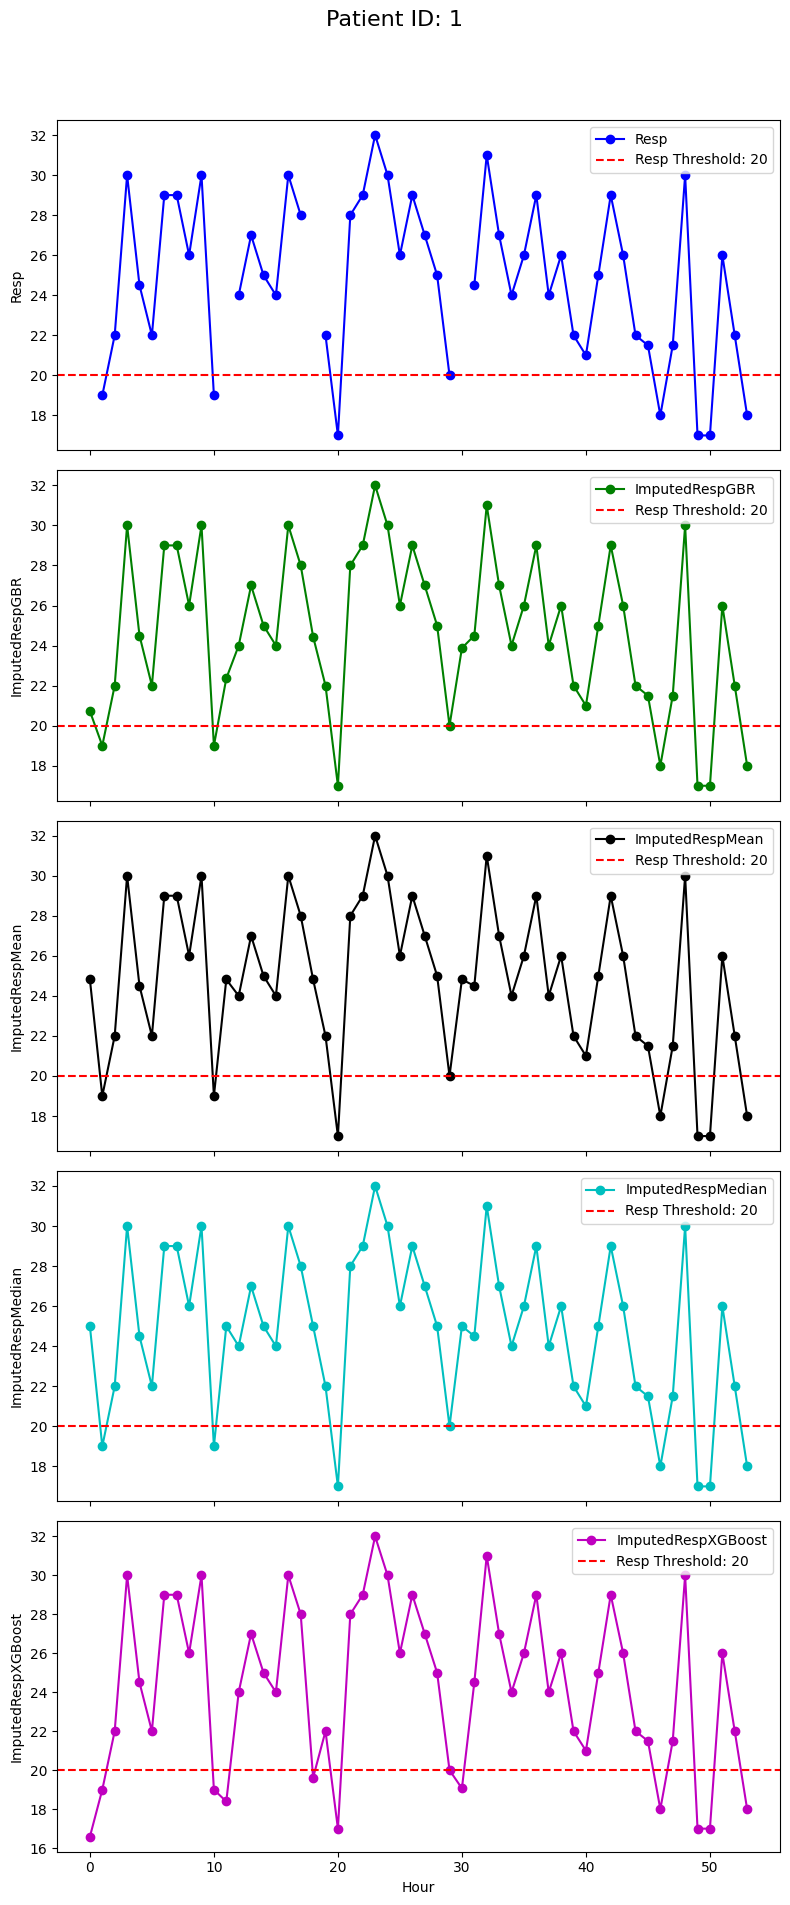

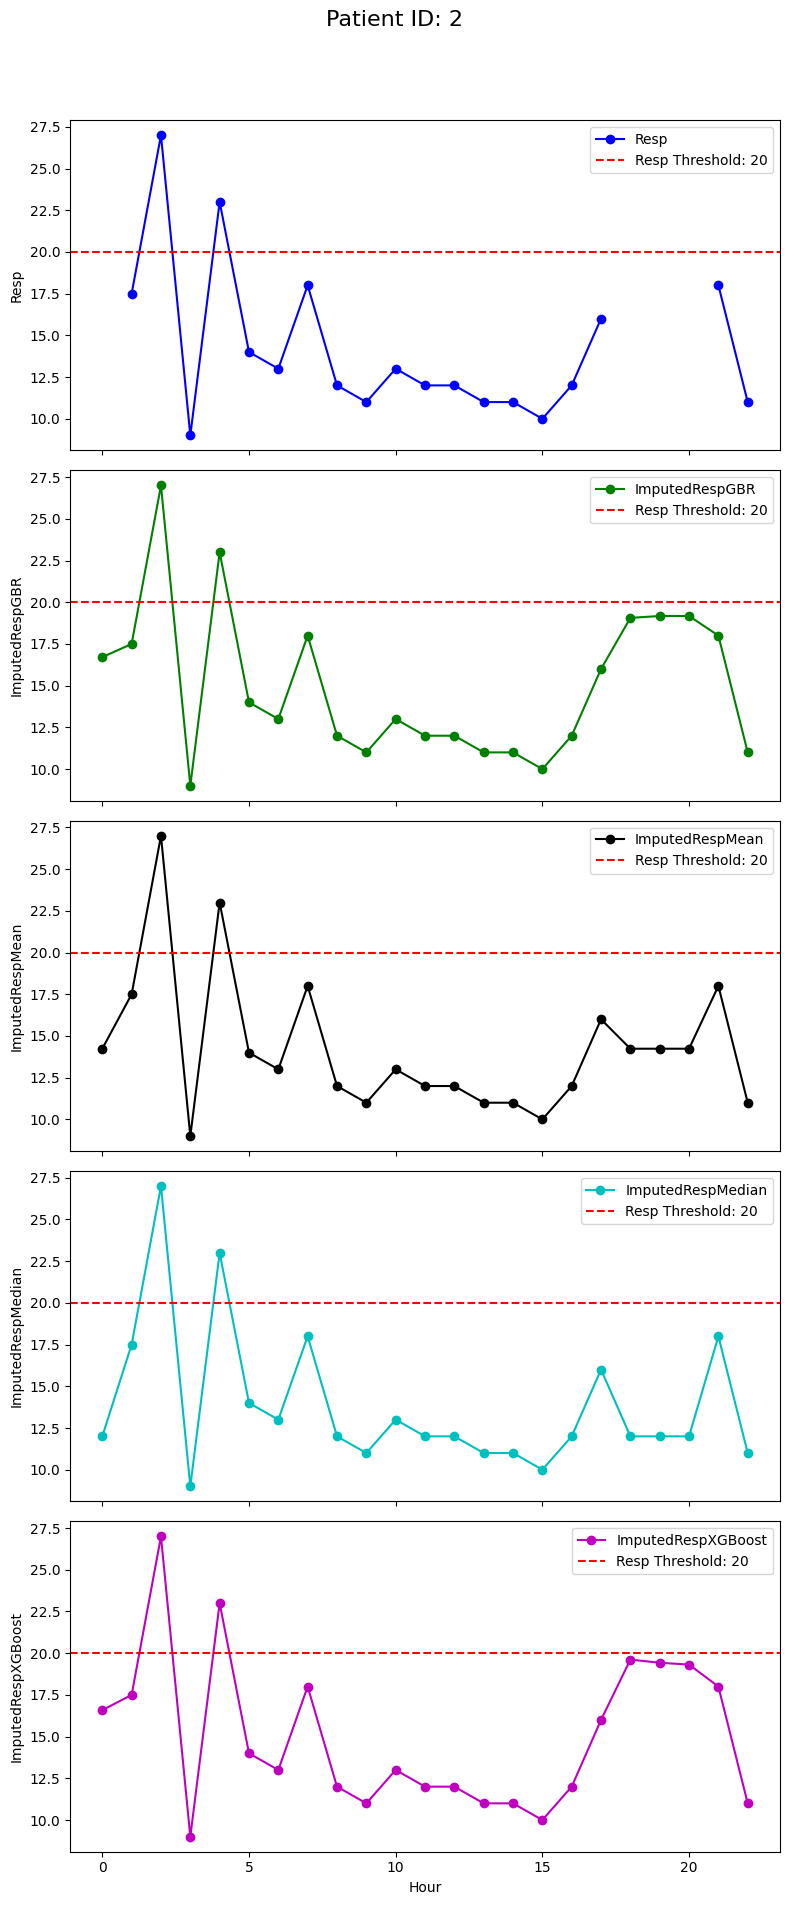

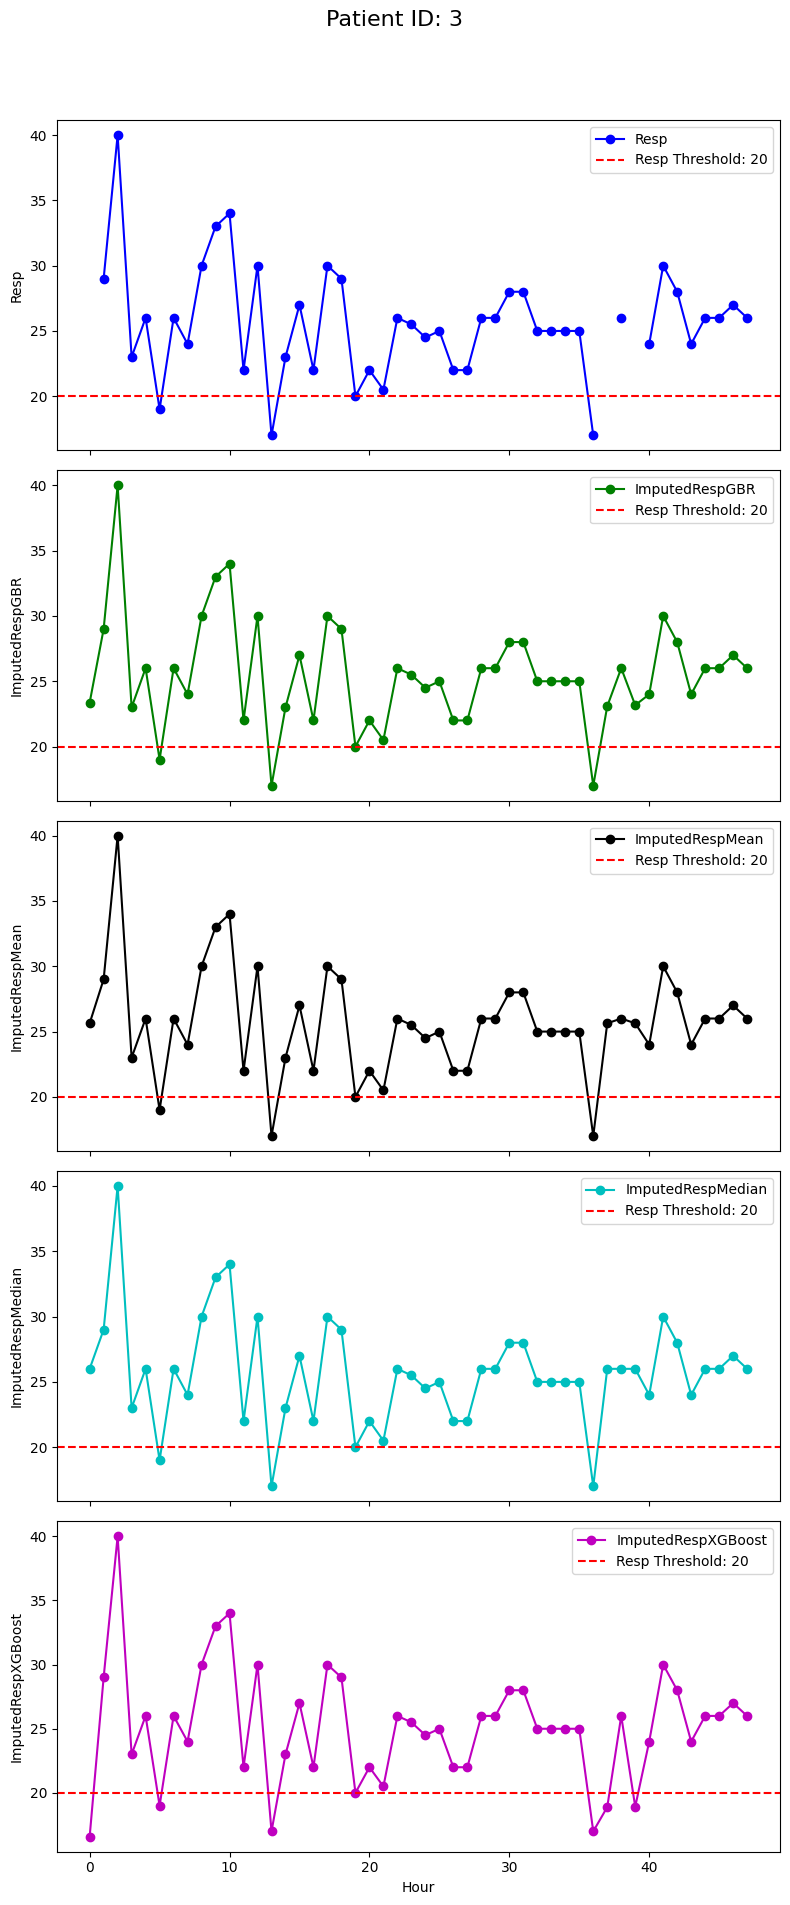

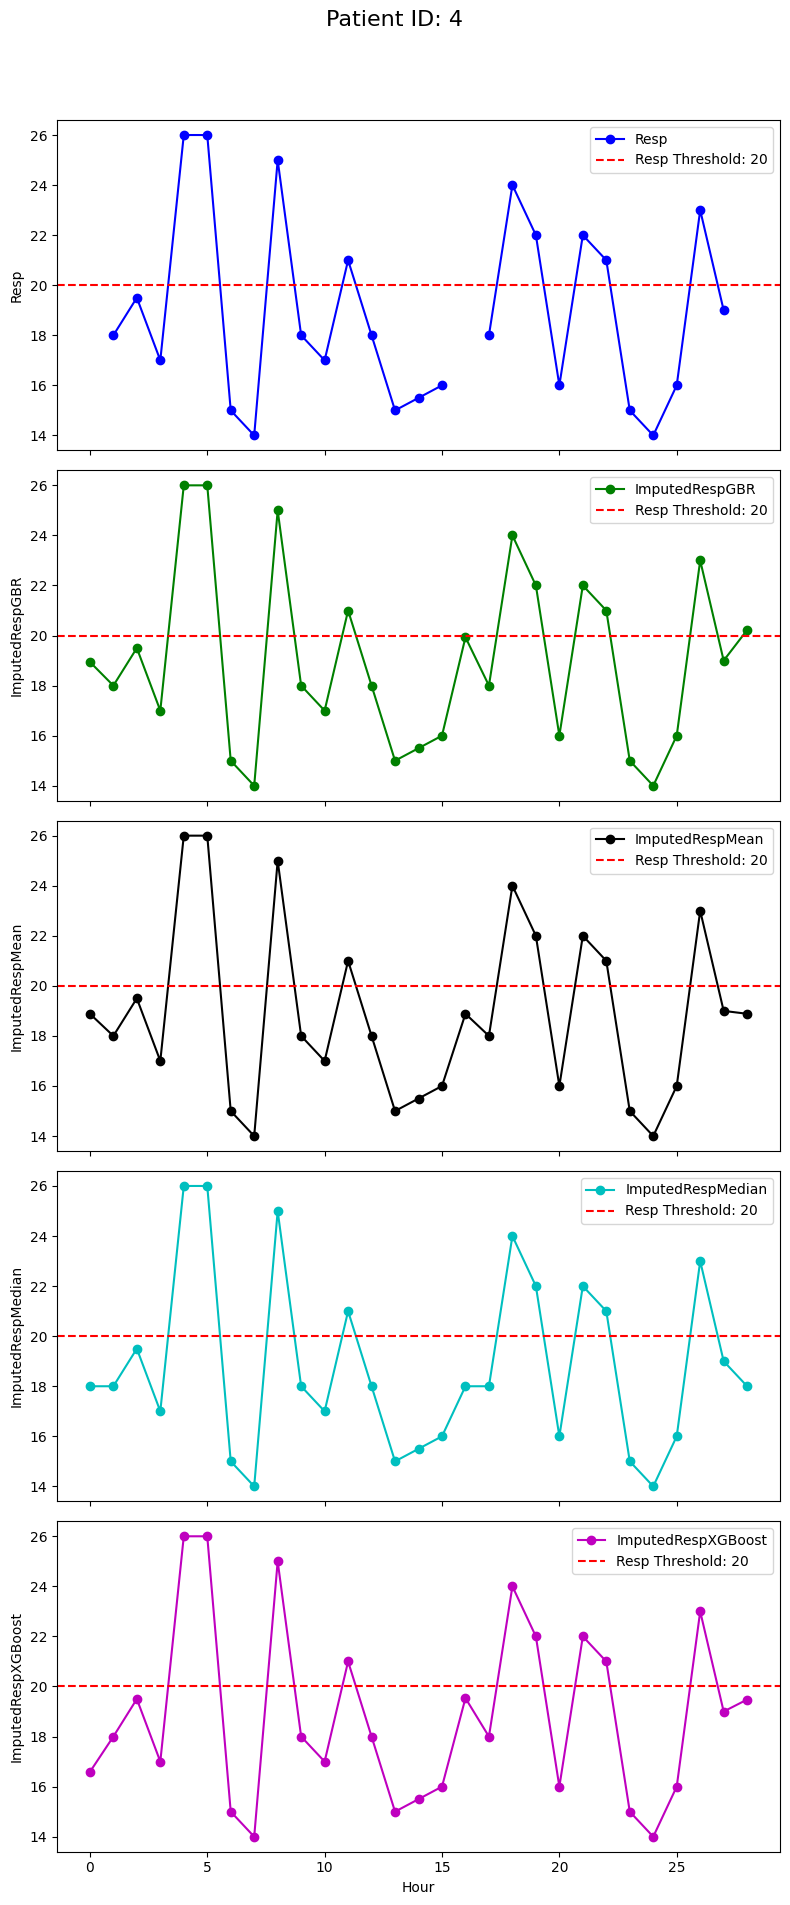

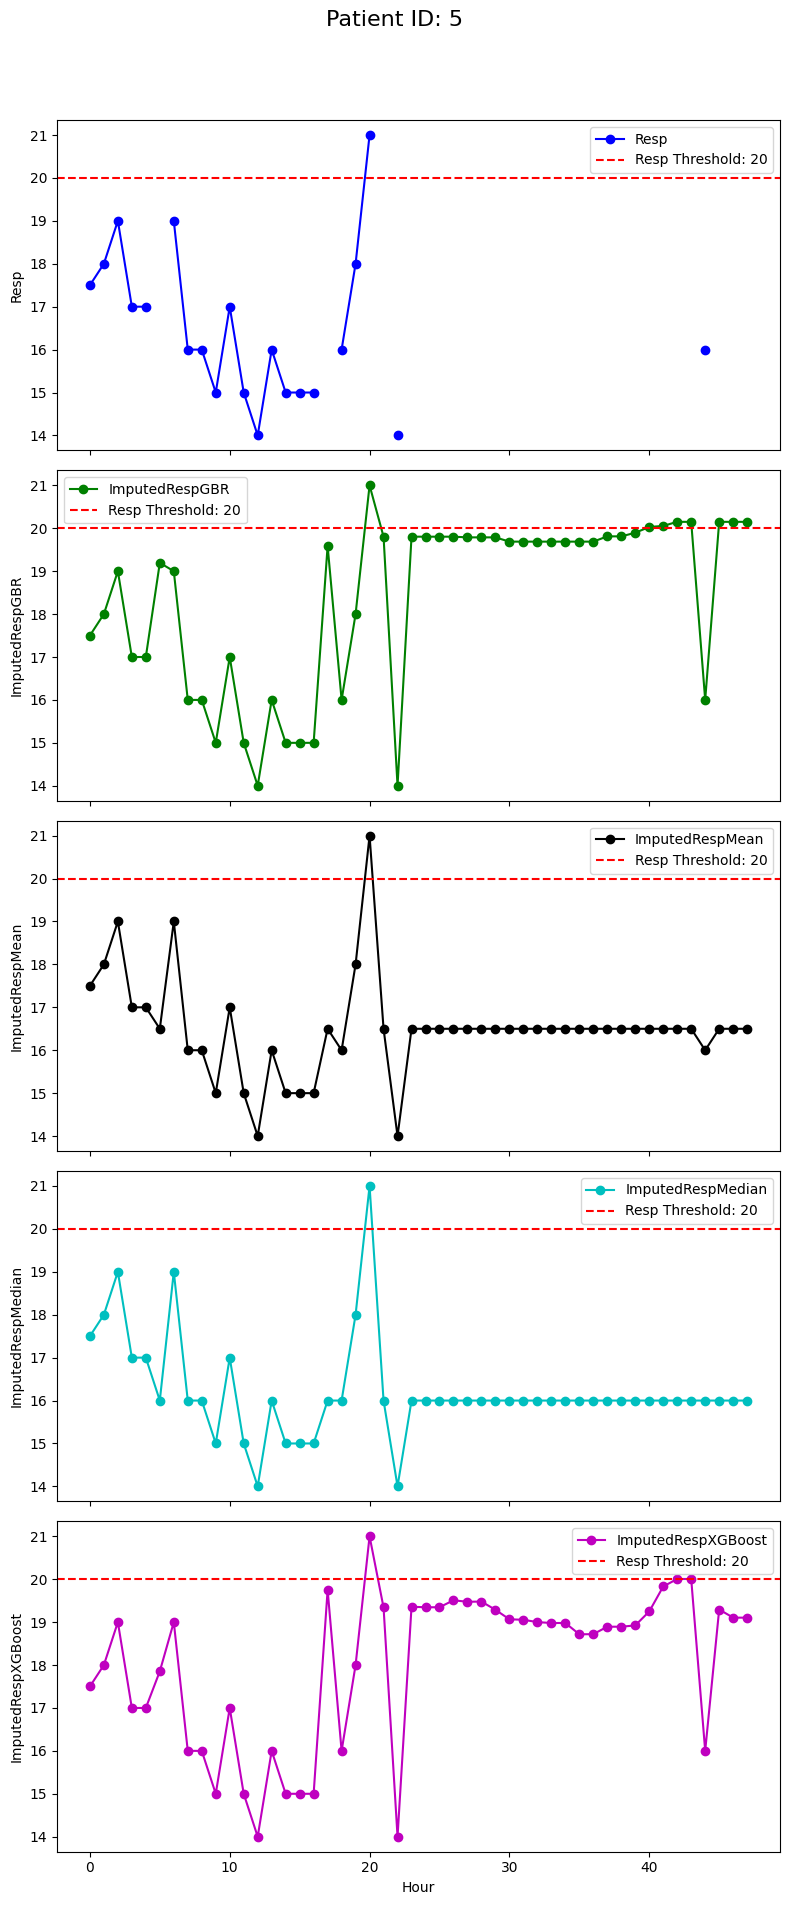

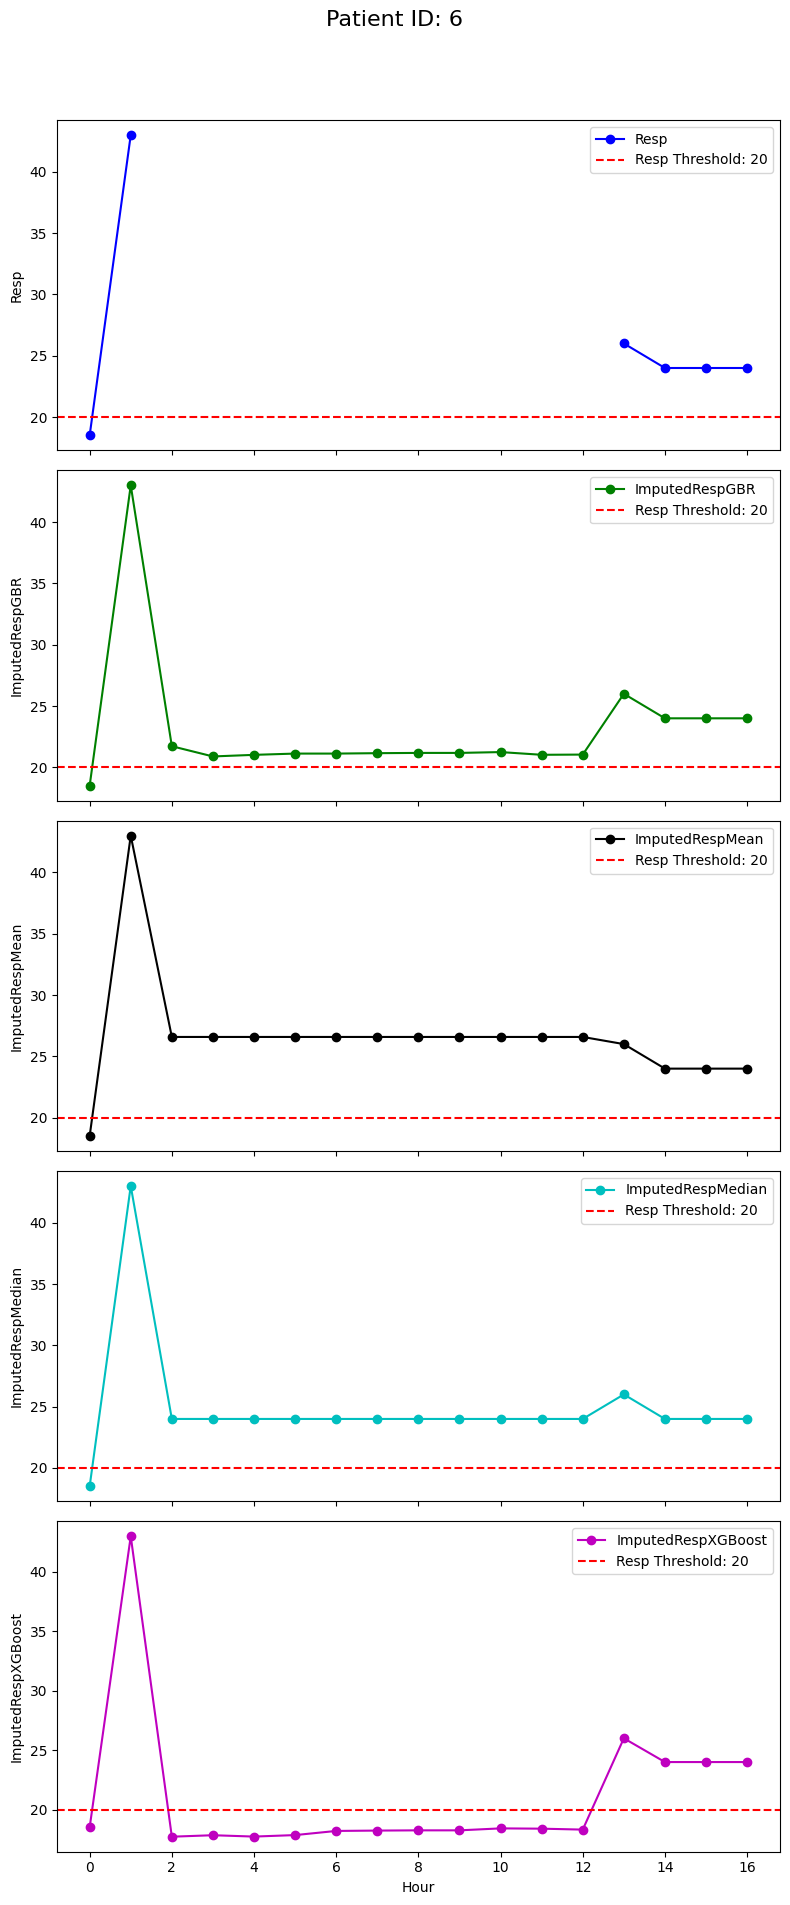

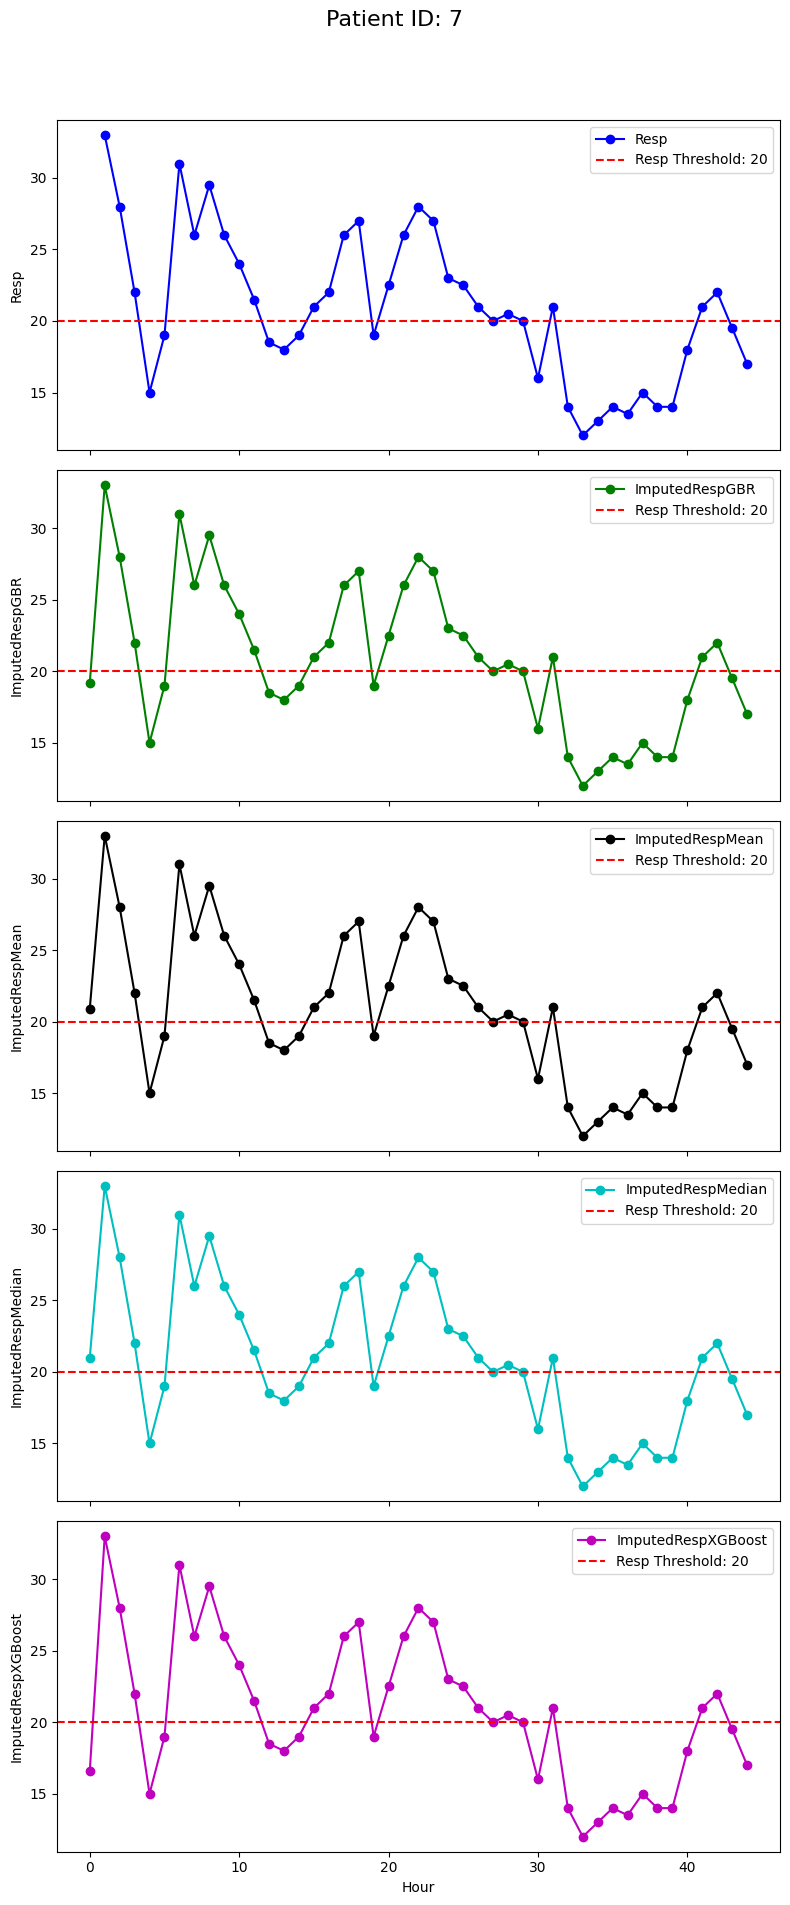

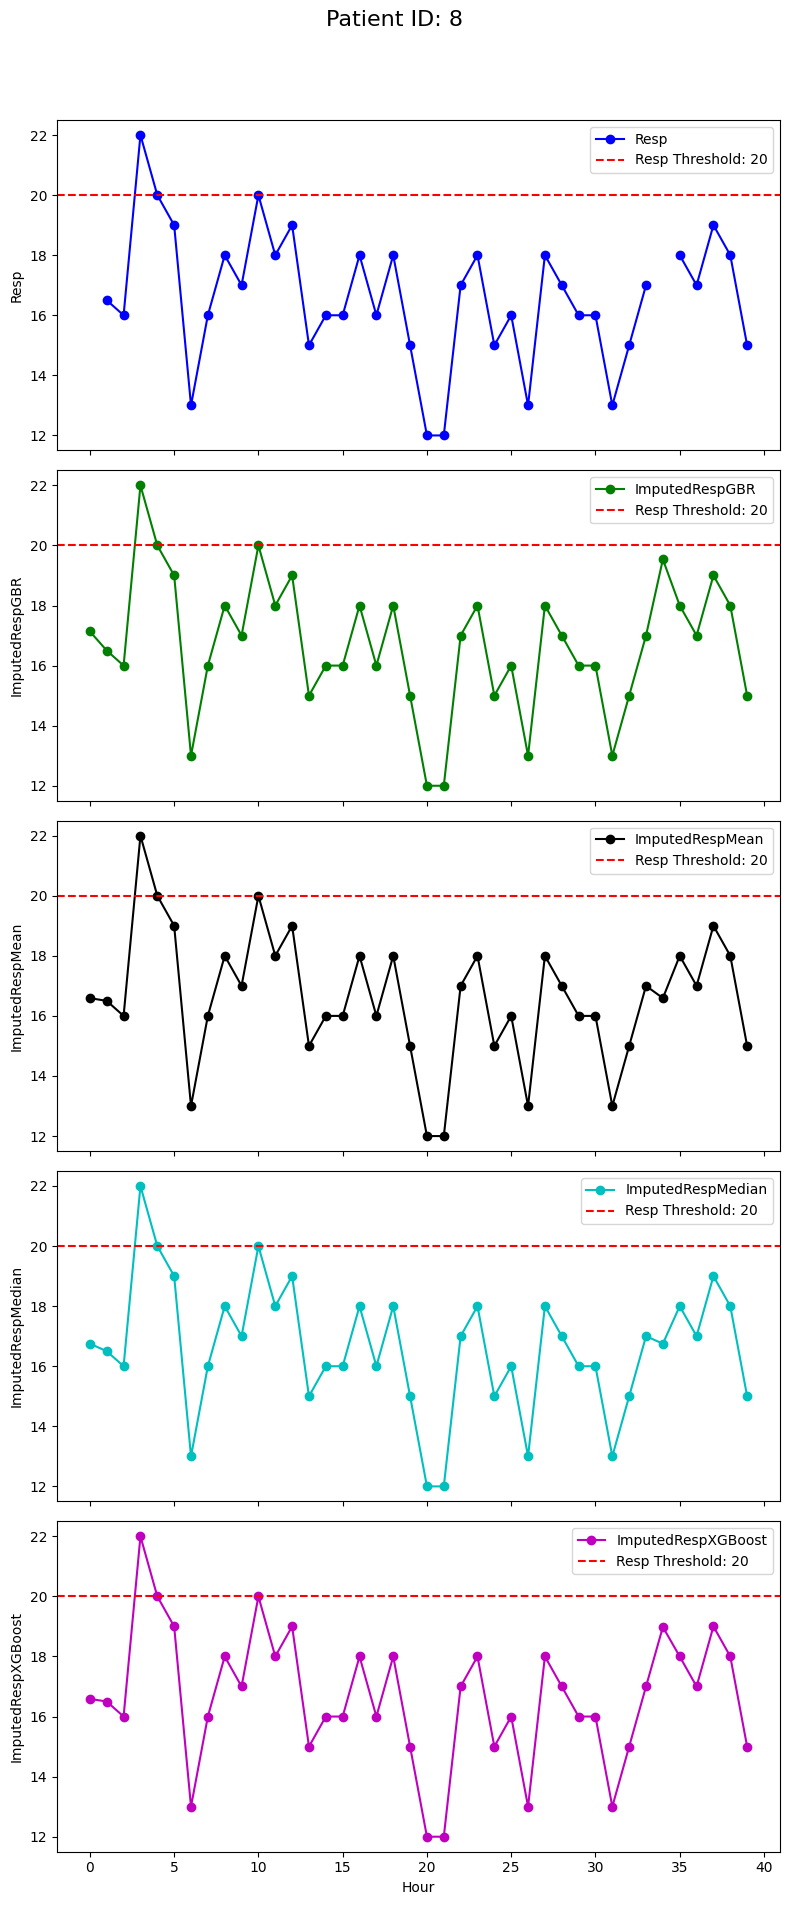

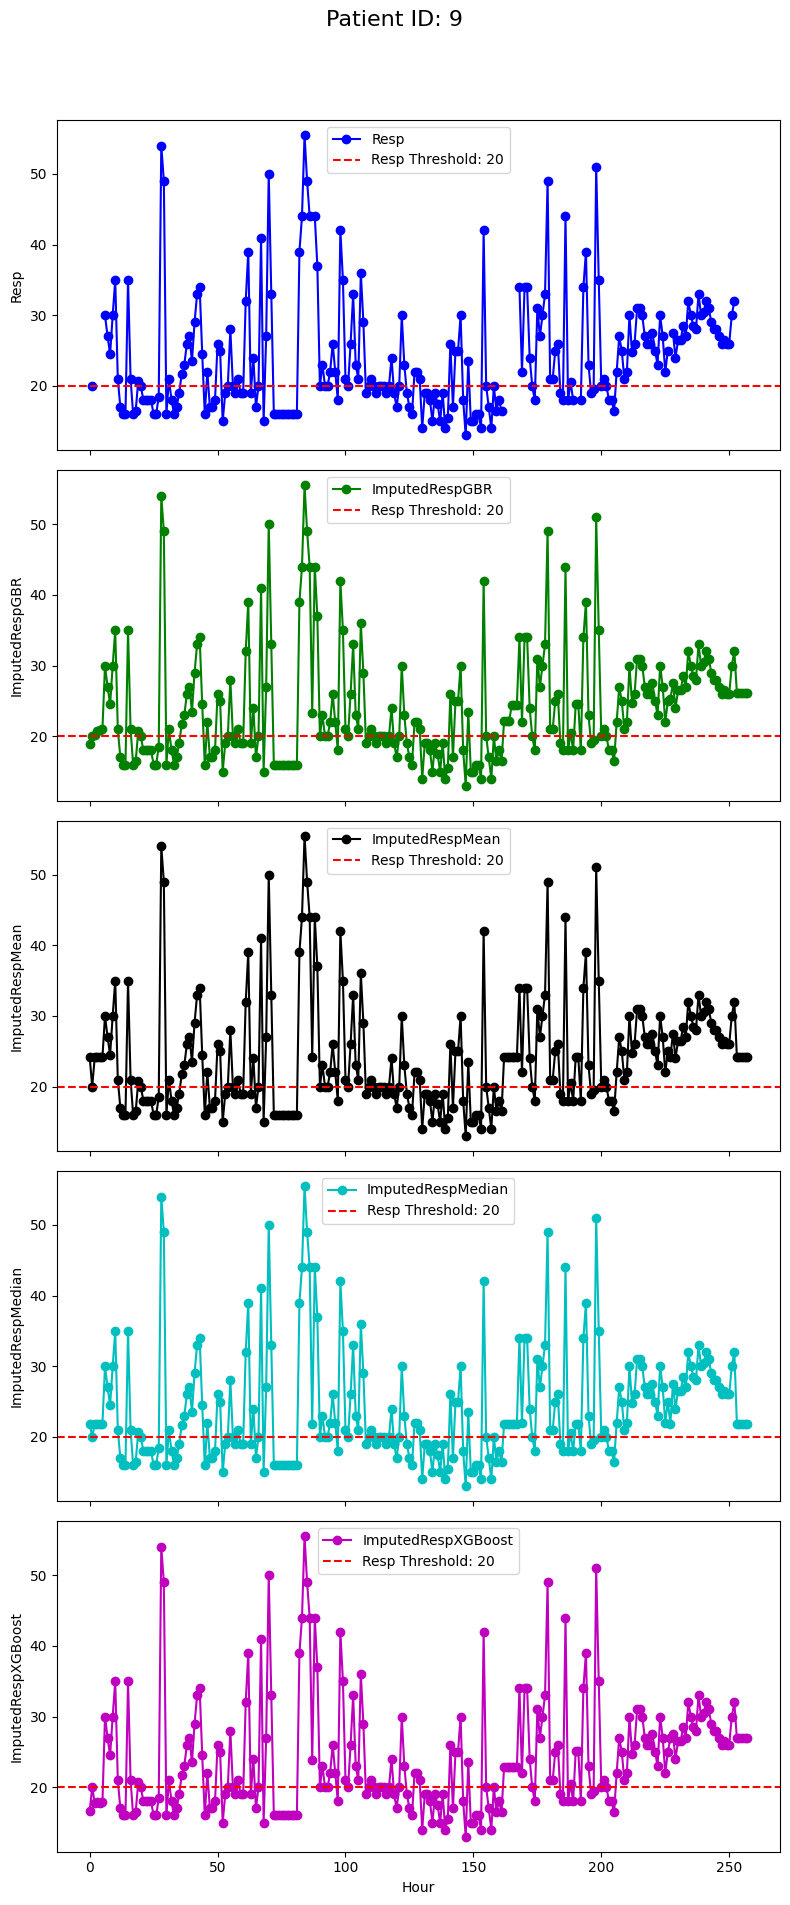

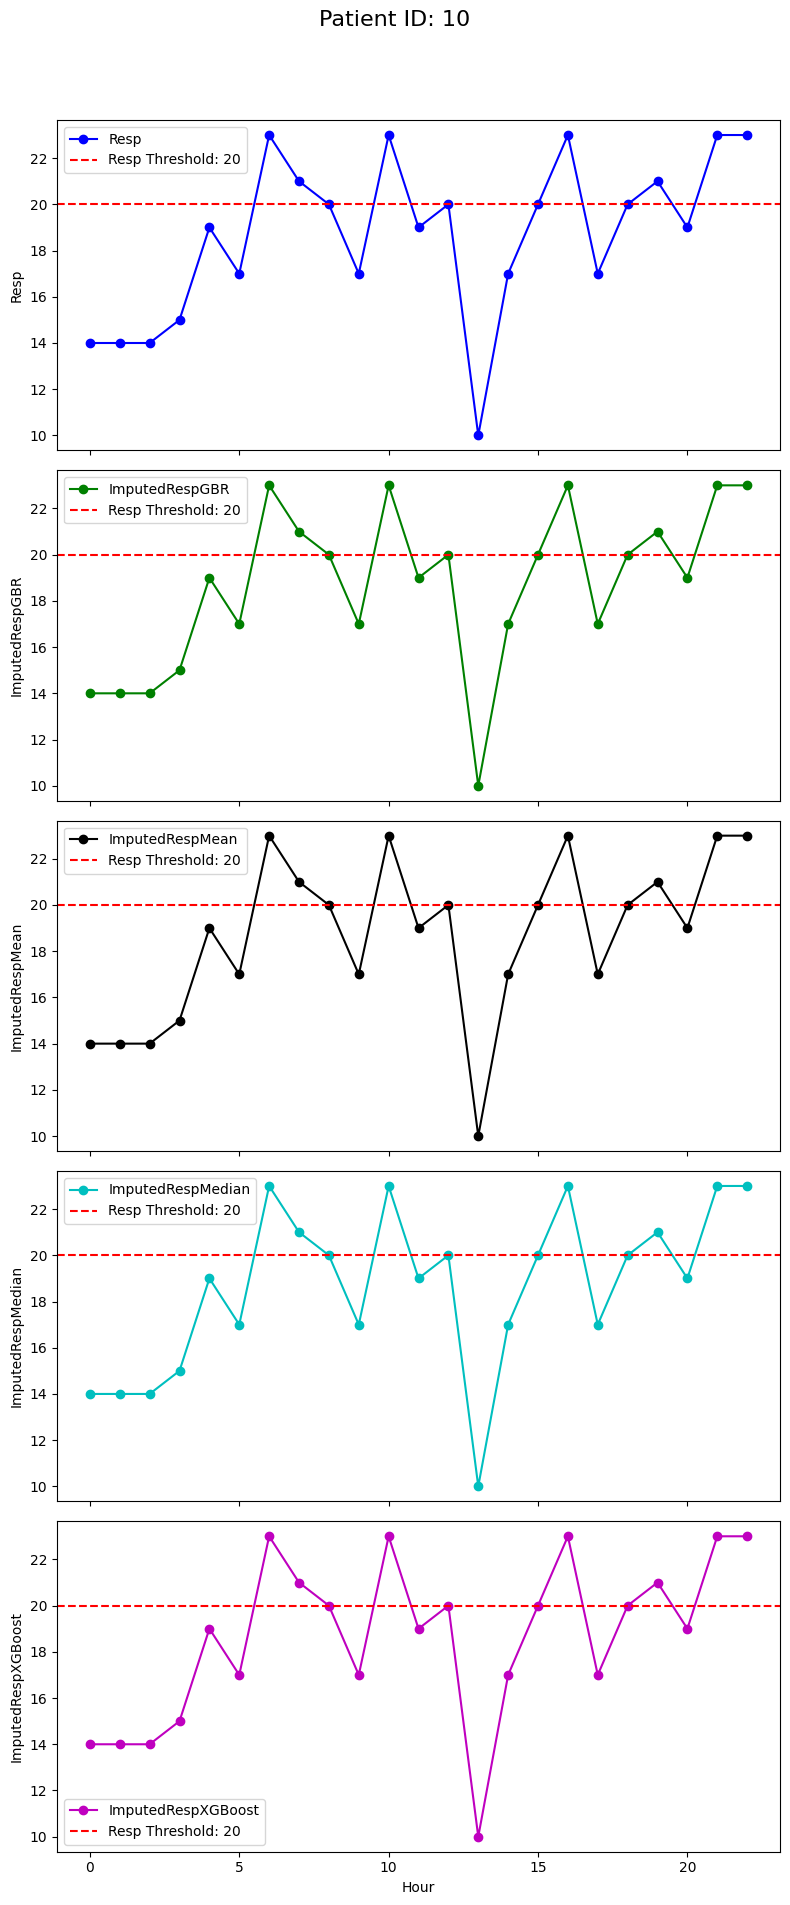

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from Excel file
excel_file = pd.ExcelFile('/Users/nargeshosseinzadeh/Documents/Persown.Doc&info/Missing Values Prediction.xlsx')

# Define the sheet name
sheet_name = 'Resp'

# Read data from the specified sheet
data = pd.read_excel(excel_file, sheet_name=sheet_name)

# Filter data for the first 10 patients
first_10_patients = data[data['Patient_ID'].isin(range(1, 11))]

# Define Resp threshold
resp_threshold = (20, float('inf'))

# Group data by 'Patient_ID' for separate plots
grouped_data = first_10_patients.groupby('Patient_ID')

# Define colors for each column
colors = ['b', 'g', 'k', 'c', 'm']

# Iterate through each patient and create separate subplots
for patient_id, group in grouped_data:
    fig, axs = plt.subplots(5, 1, figsize=(8, 20), sharex=True)
    fig.suptitle(f'Patient ID: {patient_id}', fontsize=16)
    
    # Iterate through each column and plot on separate subplot
    columns_to_plot = ['Resp', 'ImputedRespGBR', 'ImputedRespMean', 'ImputedRespMedian', 'ImputedRespXGBoost']
    for i, column in enumerate(columns_to_plot):
        axs[i].plot(group['Hour'], group[column], marker='o', linestyle='-', color=colors[i], label=column)
        axs[i].axhline(y=resp_threshold[0], color='r', linestyle='--', label=f'Resp Threshold: {resp_threshold[0]}')
        axs[i].axhline(y=resp_threshold[1], color='r', linestyle='--')
        axs[i].set_ylabel(column)
        axs[i].legend()
    
    axs[-1].set_xlabel('Hour')  # Set xlabel for the last subplot

    # Adjust layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
